In [3]:
import sys
sys.path.append('../../PI_GP_regressor')

from main_class import PhysicsInformedGP_regressor
from kernels.kernel_poisson import gram_Matrix,k_ff, k_fu, k_uf, k_uu
import numpy as np

 /home/tobias/anaconda3/envs/bac_arbeit/lib/python3.10/site-packages/scipy/stats/_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /home/tobias/anaconda3/envs/bac_arbeit/lib/python3.10/site-packages/scipy/stats/_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


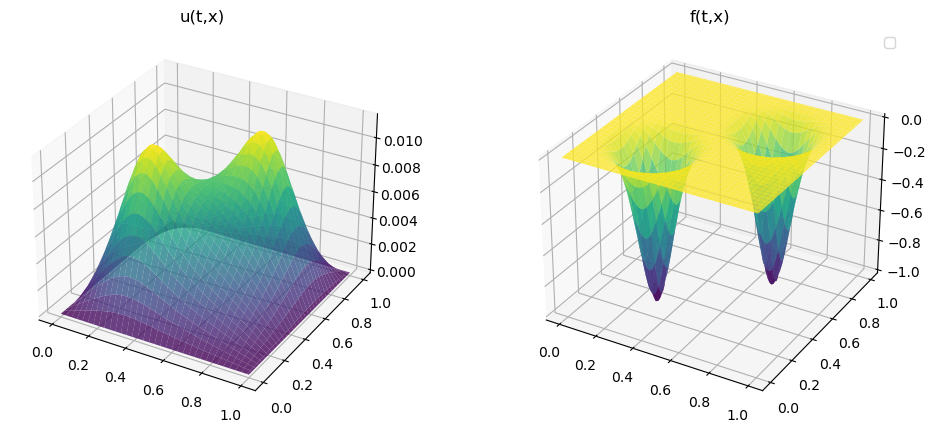

In [5]:
kernel_list = [gram_Matrix, k_uu, k_uf, k_fu, k_ff]
hyperparameters = ["l_x", "sigma_f"]
model = PhysicsInformedGP_regressor(kernel_list,timedependence=True, params = hyperparameters)
model.set_name_kernel("poisson")
n_training_points, noise_sq = 20, [1e-8,1e-8]
model.set_training_data("poisson_data.csv",n_training_points, noise_sq)
model.set_validation_data(1000)
model.plot_raw_data()

In [6]:
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-1.3,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((2))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))  #lx
    theta_initial[1] = rng.uniform(0, 1, 1)               #sigma_f              
    return theta_initial
n_restarts = 500
n_threads = 10
opt_params_dict = {'theta_initial': get_initial_values,   #needed for all optimization methods
                    'bounds': ((1e-2, None), (1e-5, None)), #needed for TNC and L-BFGS-B
                    'gtol': 1e-6}
model.train("Nelder-Mead",n_restarts, n_threads,opt_params_dict)

100%|██████████| 500/500 [00:30<00:00, 16.41it/s]


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -50.3729248046875
             x: [ 2.121e-01  2.165e-05]
           nit: 107
          nfev: 225
 final_simplex: (array([[ 2.121e-01,  2.165e-05],
                       [ 2.121e-01,  2.165e-05],
                       [ 2.121e-01,  2.165e-05]]), array([-5.037e+01, -5.037e+01, -5.037e+01]))


In [7]:
n_test_points = 100
x_star, t_star = np.meshgrid(np.linspace(0, 1, n_test_points), np.linspace(0, 1, n_test_points))
X_star = np.hstack((x_star.reshape(-1, 1), t_star.reshape(-1, 1)))
model.predict_model(X_star)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-----------------------------------------------
GP with kernel: 
Training data: (20, 2)
Training targets: (40, 1)
Hyperparameters: {'l_x': 0.2120977672157784, 'sigma_f': 2.1646397993130964e-05}
Log marginal likelihood: -50.3729248046875
Mean squared error: {'u': 3.4275518601134536e-07, 'f': 0.011044667102396488}
-----------------------------------------------



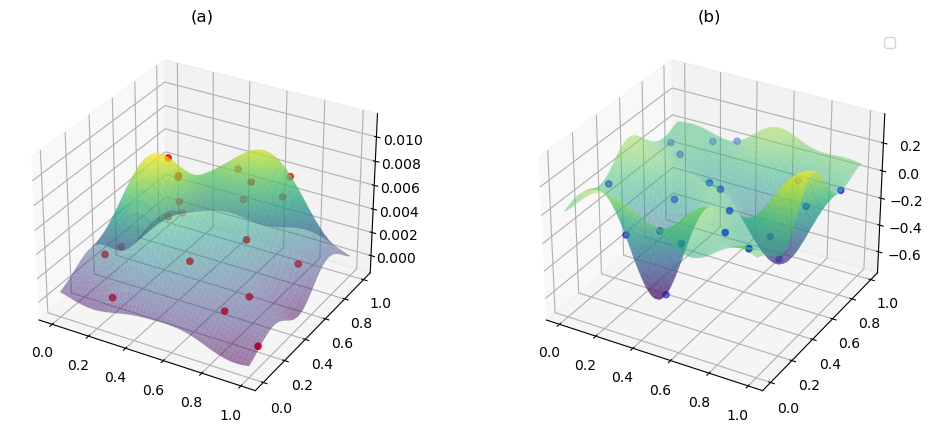

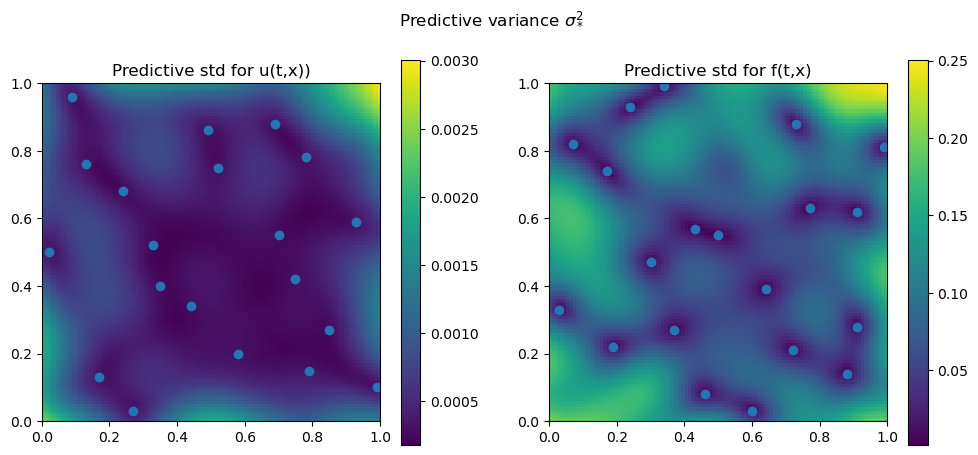

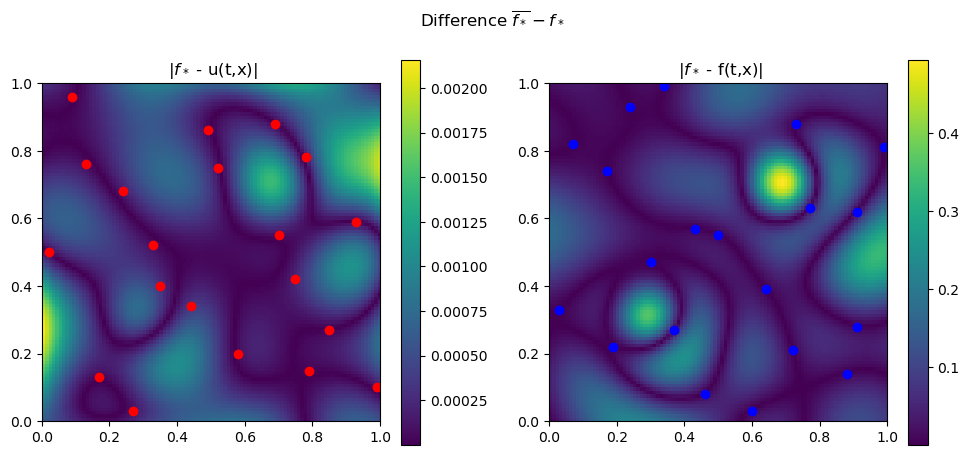

In [10]:
model.plot_prediction(X_star, "","predictive_mean.png")
model.error()
print(model)
model.plot_variance(X_star, "Predictive variance $\\sigma_*^2$", "predictive_variance.png")
model.plot_difference( "Difference $\\overline{ f_*} - f_*$", "difference.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MSE_u:  5.642976042097469e-07
MSE_f:  0.043975560529501356


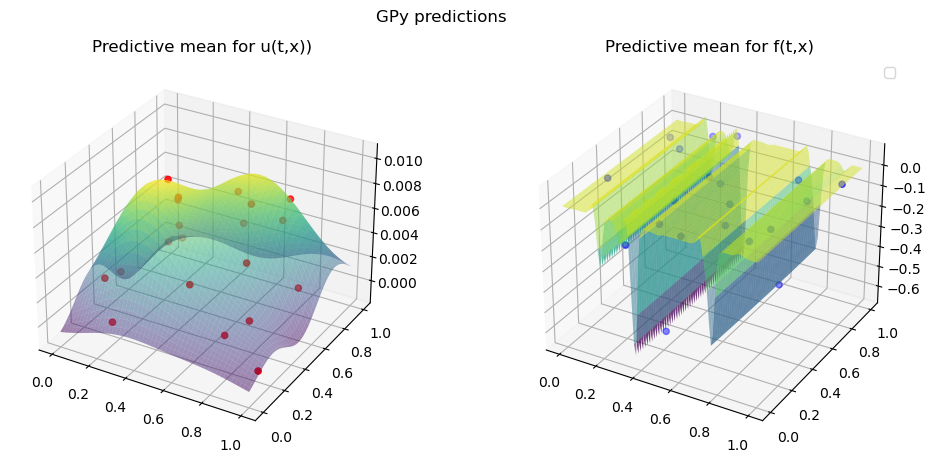

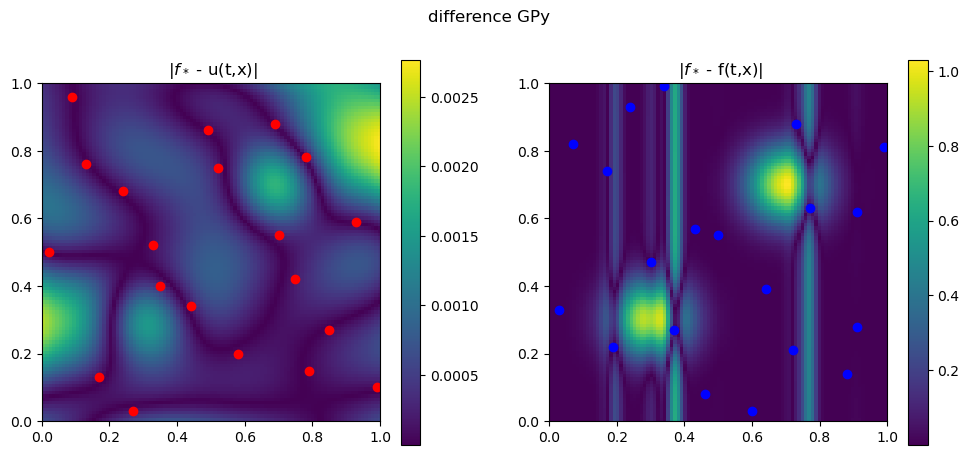

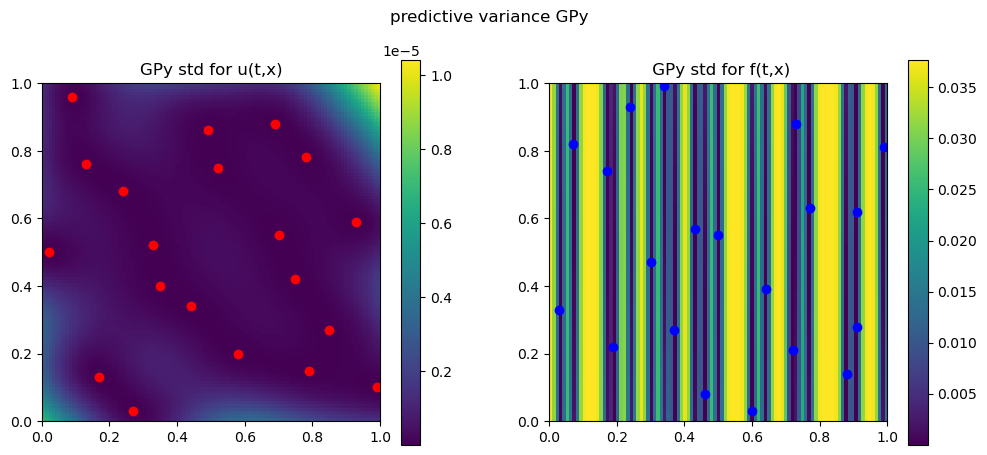

In [13]:
model.use_GPy(X_star,"gpy")
model.plot_difference_GPy("difference GPy ", "GPy_difference.png")
model.plot_variance_GPy("predictive variance GPy ", "GPy_variance.png")